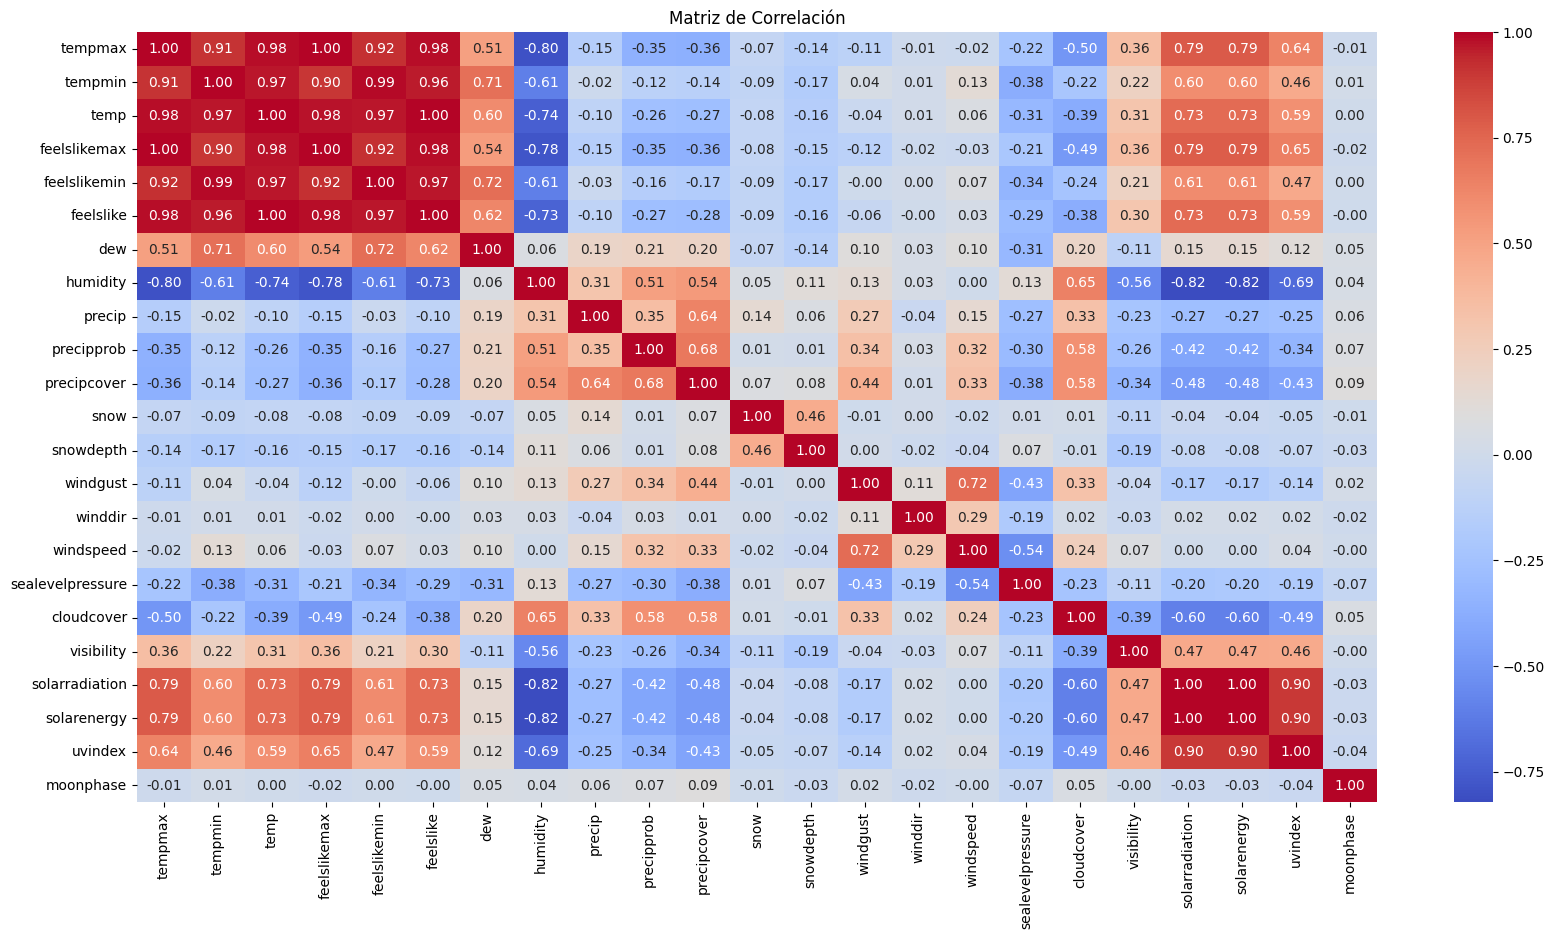

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windgust,winddir,windspeed,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
tempmax,1.000000,0.908133,0.980914,0.995679,0.915919,0.978981,0.514210,-0.798214,-0.153775,-0.354713,...,-0.110604,-0.012025,-0.018332,-0.224484,-0.499130,0.358258,0.788198,0.788245,0.644064,-0.013787
tempmin,0.908133,1.000000,0.966940,0.904816,0.991821,0.962796,0.713233,-0.608382,-0.023272,-0.124609,...,0.044806,0.009019,0.129589,-0.379365,-0.217347,0.223843,0.598027,0.597826,0.464134,0.013442
temp,0.980914,0.966940,1.000000,0.975814,0.967292,0.996054,0.603231,-0.743578,-0.102360,-0.262409,...,-0.035314,0.006284,0.062199,-0.313160,-0.386403,0.311104,0.734124,0.734017,0.585965,0.000212
feelslikemax,0.995679,0.904816,0.975814,1.000000,0.916454,0.979878,0.536965,-0.780423,-0.149354,-0.349597,...,-0.118529,-0.018921,-0.030529,-0.213507,-0.485056,0.356609,0.786265,0.786291,0.651531,-0.016061
feelslikemin,0.915919,0.991821,0.967292,0.916454,1.000000,0.971496,0.720613,-0.605143,-0.034882,-0.156656,...,-0.004621,0.004629,0.072805,-0.335020,-0.236738,0.213664,0.605714,0.605516,0.471721,0.002486
feelslike,0.978981,0.962796,0.996054,0.979878,0.971496,1.000000,0.624179,-0.727089,-0.102044,-0.268055,...,-0.060579,-0.000439,0.031063,-0.290156,-0.379183,0.304562,0.732768,0.732648,0.589317,-0.004188
dew,0.514210,0.713233,0.603231,0.536965,0.720613,0.624179,1.000000,0.061382,0.190516,0.206104,...,0.096072,0.032236,0.095749,-0.311633,0.195088,-0.105314,0.152337,0.152324,0.115896,0.046596
humidity,-0.798214,-0.608382,-0.743578,-0.780423,-0.605143,-0.727089,0.061382,1.000000,0.312866,0.510525,...,0.133980,0.032038,0.002328,0.130814,0.650310,-0.560238,-0.822310,-0.822206,-0.692091,0.039865
precip,-0.153775,-0.023272,-0.102360,-0.149354,-0.034882,-0.102044,0.190516,0.312866,1.000000,0.354219,...,0.269059,-0.041111,0.146041,-0.273459,0.334451,-0.227170,-0.270296,-0.270720,-0.253488,0.058294
precipprob,-0.354713,-0.124609,-0.262409,-0.349597,-0.156656,-0.268055,0.206104,0.510525,0.354219,1.000000,...,0.342780,0.034061,0.322473,-0.300776,0.580686,-0.256772,-0.422036,-0.422469,-0.336138,0.071881


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import numpy as np


# Muestra todas las filas
#pd.set_option('display.max_rows', None)  
#pd.set_option('display.max_columns', None)  
df = pd.read_csv("Madrid 2022-02-08 to 2024-11-01.csv")


#Juntamos el csv con "madrid 2019-04-08 to 2022-01-01.csv"
df2 = pd.read_csv("madrid 2019-04-08 to 2022-01-01.csv")
df3 =pd.read_csv("madrid 2022-01-02 to 2022-02-07.csv")
df = pd.concat([df, df2, df3], ignore_index=True)

#Ordenamos por fecha
df = df.sort_values(by='datetime', ascending=True) 
df.reset_index(drop=True, inplace=True)

df.drop("name", axis=1, inplace=True)


# Convertir la columna a tipo datetime
df['datetime'] = pd.to_datetime(df['datetime'])

#Crear  columna años
df["year"]=df["datetime"].dt.year





#Correlaciones


correlaciones = df[["tempmax","tempmin","temp","feelslikemax","feelslikemin","feelslike","dew","humidity","precip","precipprob","precipcover","snow","snowdepth","windgust","winddir","windspeed","sealevelpressure","cloudcover","visibility","solarradiation","solarenergy","uvindex","moonphase"]].corr()

# Configuramos el tamaño de la figura para que se vea bien
plt.figure(figsize=(20,10))

# Creamos un mapa de calor (heatmap) con la matriz de correlación del DataFrame `df`
sns.heatmap(
    correlaciones,        # Calculamos la matriz de correlación
    annot=True,       # Mostramos los valores numéricos dentro de cada celda
    cmap='coolwarm',  # Usamos una paleta de colores que va de azul a rojo
    fmt=".2f"         # Limitamos los valores a 2 decimales
)

# Añadimos un título al gráfico
plt.title("Matriz de Correlación")

# Mostramos la gráfica generada
plt.show()


correlaciones


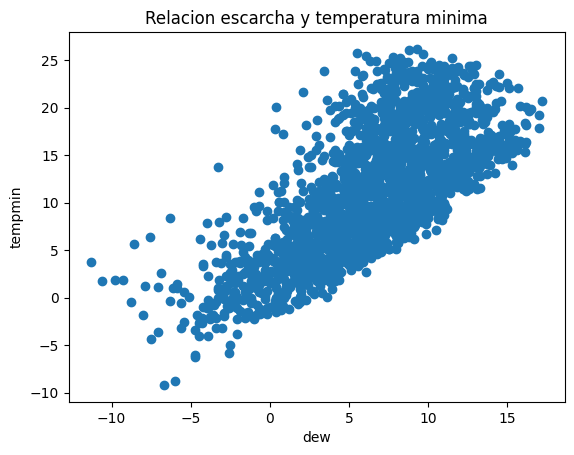

In [2]:
# Graficar  dew y temopmin



plt.scatter(df["dew"],df["tempmin"])
plt.xlabel("dew")
plt.ylabel("tempmin")
plt.title("Relacion escarcha y temperatura minima")
plt.show()



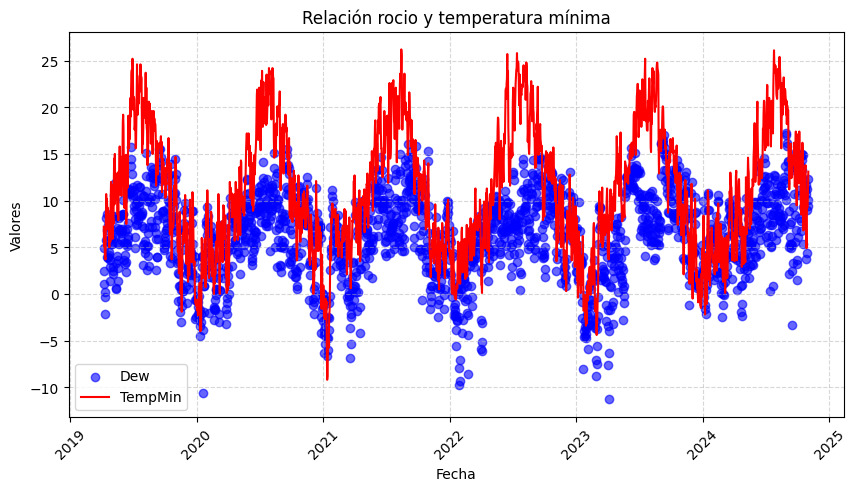

In [3]:
grouped= df.groupby("year")


import matplotlib.pyplot as plt

# Graficar dew como puntos y tempmin como línea
plt.figure(figsize=(10, 5))  # Ajustar tamaño de la gráfica
plt.scatter(df["datetime"], df["dew"], label="Dew", color="blue", alpha=0.6)
plt.plot(df["datetime"], df["tempmin"], label="TempMin", color="red")

# Mejoras en la visualización
plt.title("Relación rocio y temperatura mínima")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)  # Agregar rejilla suave

# Mostrar gráfica
plt.show()

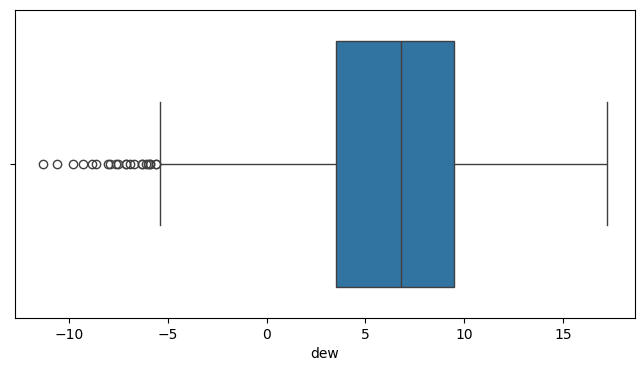

Valores atípicos positivos detectados:
 Empty DataFrame
Columns: [datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, sunrise, sunset, moonphase, conditions, description, icon, stations, year, z_score]
Index: []

[0 rows x 34 columns]
Valores atípicos negativos detectados:
        datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
287  2020-01-20      6.4      1.7   4.0           2.2          -2.6   
1026 2022-01-28     14.5      1.2   7.7          14.5           1.2   
1027 2022-01-29     16.3      1.9   8.5          16.3           0.4   
1028 2022-01-30     16.4      1.9   8.5          16.4           0.5   
1051 2022-02-22     19.4      5.6  12.4          19.4           3.7   
1385 2023-01-22      9.0     -1.8   3.7           6.6          -2.9   
1421 202

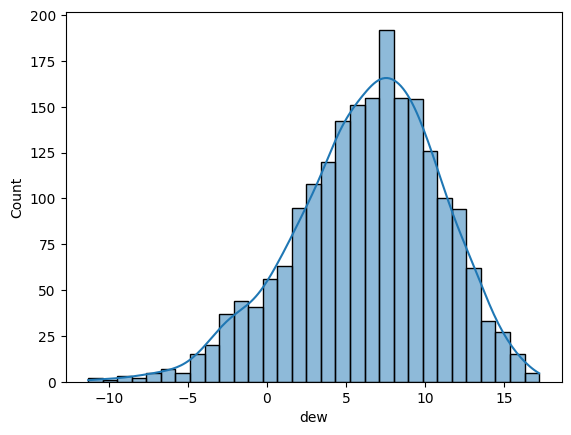

Skewness: -0.4517027902436499


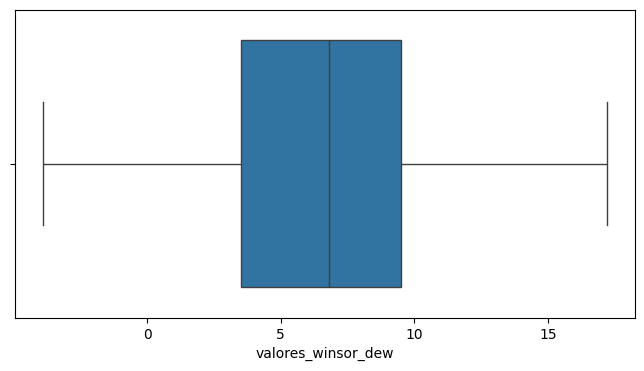

Skewness: -0.2924572821308798
Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'year', 'z_score', 'valores_winsor_dew'],
      dtype='object')


In [4]:
# Creamos el Boxplot dew

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['dew']) #df['valores'] es una columna de un DataFrame que contiene los datos que queremos analizar.

# Mostramos el gráfico
plt.show()

# Calcular el Z-score
df['z_score'] = zscore(df['dew'])

# Filtrar outliers poisitivos y negativos
outliers_positivos = df[df['z_score'] > 3]   # Solo valores muy altos
outliers_negativos = df[df['z_score'] < -3]  # Solo valores muy bajos

print("Valores atípicos positivos detectados:\n", outliers_positivos)
print("Valores atípicos negativos detectados:\n", outliers_negativos)

# Calcular cuartiles
Q1 = np.percentile(df['dew'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(df['dew'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['dew'] < limite_inferior) | (df['dew'] > limite_superior)]
print("Outliers encontrados:\n", outliers) # Los valores que están fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR] se consideran outliers.

#Grafico distribucion
sns.histplot(df['dew'], kde=True)
plt.show()

from scipy.stats import skew

print("Skewness:", skew(df['dew']))

#Winsorizacion
from scipy.stats.mstats import winsorize

df['valores_winsor_dew'] = winsorize(df['dew'], limits=[0.02, 0])  # Recorta el 5% inferior y superior

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['valores_winsor_dew']) #df['valores'] es una columna de un DataFrame que contiene los datos que queremos analizar.

# Mostramos el gráfico
plt.show()

print("Skewness:", skew(df['valores_winsor_dew']))


print(df.columns)


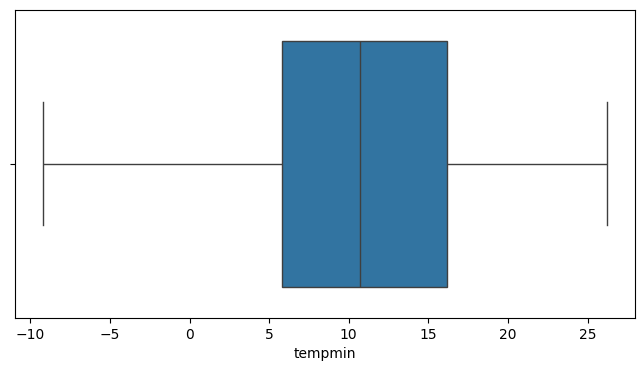

Valores atípicos positivos detectados:
 Empty DataFrame
Columns: [datetime, tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, preciptype, snow, snowdepth, windgust, windspeed, winddir, sealevelpressure, cloudcover, visibility, solarradiation, solarenergy, uvindex, severerisk, sunrise, sunset, moonphase, conditions, description, icon, stations, year, z_score, valores_winsor_dew]
Index: []

[0 rows x 35 columns]
Valores atípicos negativos detectados:
       datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  feelslike  \
645 2021-01-12      2.0     -9.2  -3.5           2.0          -9.2       -3.6   

     dew  humidity  precip  ...              sunrise               sunset  \
645 -3.9      79.3     0.0  ...  2021-01-12T08:36:59  2021-01-12T18:09:40   

    moonphase  conditions                           description       icon  \
645      0.97       Clear  Clear conditions throughout the day.  clear-day   

          

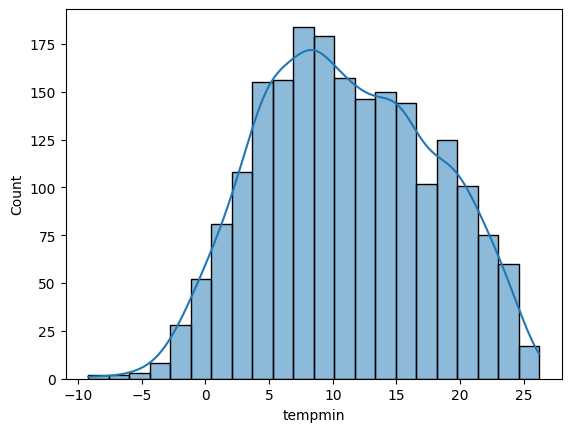

Skewness: 0.05549120967704703


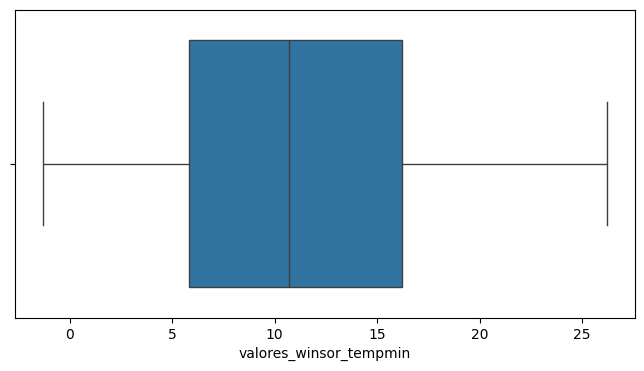

Skewness: 0.11588096588373215
Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations',
       'year', 'z_score', 'valores_winsor_dew', 'valores_winsor_tempmin'],
      dtype='object')


In [5]:
# Creamos el Boxplot dew

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['tempmin']) #df['valores'] es una columna de un DataFrame que contiene los datos que queremos analizar.

# Mostramos el gráfico
plt.show()

# Calcular el Z-score
df['z_score'] = zscore(df['tempmin'])

# Filtrar outliers poisitivos y negativos
outliers_positivos = df[df['z_score'] > 3]   # Solo valores muy altos
outliers_negativos = df[df['z_score'] < -3]  # Solo valores muy bajos

print("Valores atípicos positivos detectados:\n", outliers_positivos)
print("Valores atípicos negativos detectados:\n", outliers_negativos)

# Calcular cuartiles
Q1 = np.percentile(df['tempmin'], 25)  # Primer cuartil (Q1)
Q3 = np.percentile(df['tempmin'], 75)  # Tercer cuartil (Q3)
IQR = Q3 - Q1  # Rango intercuartil

# Definir límites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df[(df['tempmin'] < limite_inferior) | (df['tempmin'] > limite_superior)]
print("Outliers encontrados:\n", outliers) # Los valores que están fuera del rango [Q1 - 1.5*IQR, Q3 + 1.5*IQR] se consideran outliers.

#Grafico distribucion
sns.histplot(df['tempmin'], kde=True)
plt.show()

from scipy.stats import skew

print("Skewness:", skew(df['tempmin']))

#Winsorizacion
from scipy.stats.mstats import winsorize

df['valores_winsor_tempmin'] = winsorize(df['tempmin'], limits=[0.02, 0])  # Recorta el 5% inferior y superior

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['valores_winsor_tempmin']) #df['valores'] es una columna de un DataFrame que contiene los datos que queremos analizar.

# Mostramos el gráfico
plt.show()
print("Skewness:", skew(df['valores_winsor_tempmin']))


print(df.columns)


In [6]:
#Categorizar la columna icon
labelencoder=LabelEncoder()
df["icono numero"]= labelencoder.fit_transform(df["icon"])
df



,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,moonphase,conditions,description,icon,stations,year,z_score,valores_winsor_dew,valores_winsor_tempmin,icono numero
0,2019-04-08,16.7,7.2,10.7,16.7,6.2,10.5,4.9,71.7,2.043,...,0.11,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"08224099999,D8661,08219099999,08220099999,0821...",2019,-0.582150,4.9,7.2,3
1,2019-04-09,13.1,5.1,8.6,13.1,3.7,7.5,2.5,67.6,0.416,...,0.14,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"08224099999,D8661,08219099999,08220099999,0821...",2019,-0.894801,2.5,5.1,3
2,2019-04-10,14.7,6.2,9.9,14.7,3.9,8.9,1.1,56.0,0.685,...,0.18,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"08221099999,08224099999,LEMD,D8661,08226099999...",2019,-0.731031,1.1,6.2,3
3,2019-04-11,16.5,4.4,10.5,16.5,2.3,10.0,-0.3,49.1,0.000,...,0.21,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"08221099999,08224099999,LEMD,D8661,08226099999...",2019,-0.999017,-0.3,4.4,2
4,2019-04-12,18.7,3.9,11.4,18.7,3.9,11.2,0.2,49.4,0.000,...,0.25,Clear,Clear conditions throughout the day.,clear-day,"08221099999,08224099999,LEMD,D8661,08226099999...",2019,-1.073458,0.2,3.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,2024-10-28,18.9,9.1,13.7,18.9,7.4,13.4,9.0,74.5,0.737,...,0.86,"Rain, Partially cloudy",Partly cloudy throughout the day with rain cle...,rain,"08221099999,08224099999,C1784,LEVS,08226099999...",2024,-0.299276,9.0,9.1,3
2031,2024-10-29,15.7,9.3,14.3,15.7,6.4,14.2,11.2,81.5,4.905,...,0.90,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"08221099999,08224099999,C1784,LEMD,LEVS,082260...",2024,-0.269500,11.2,9.3,3
2032,2024-10-30,19.2,9.3,14.5,19.2,6.5,14.2,9.4,73.0,19.950,...,0.93,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"08221099999,08224099999,C1784,LEVS,08226099999...",2024,-0.269500,9.4,9.3,3
2033,2024-10-31,19.9,11.0,15.4,19.9,11.0,15.4,10.1,71.2,0.012,...,0.96,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"08221099999,08224099999,C1784,LEVS,08226099999...",2024,-0.016403,10.1,11.0,3


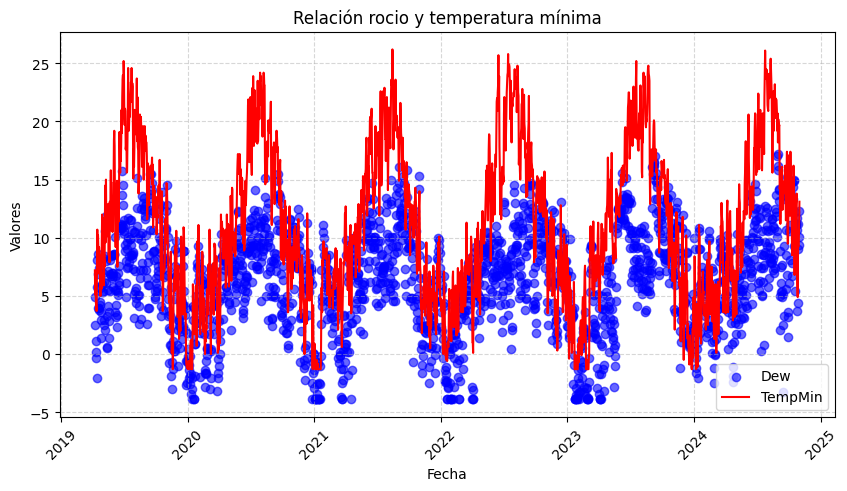

In [7]:
# Graficar dew como puntos y tempmin como línea
plt.figure(figsize=(10, 5))  # Ajustar tamaño de la gráfica
plt.scatter(df["datetime"], df["valores_winsor_dew"], label="Dew", color="blue", alpha=0.6)
plt.plot(df["datetime"], df["valores_winsor_tempmin"], label="TempMin", color="red")

# Mejoras en la visualización
plt.title("Relación rocio y temperatura mínima")
plt.xlabel("Fecha")
plt.ylabel("Valores")
plt.legend()
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor lectura
plt.grid(True, linestyle="--", alpha=0.5)  # Agregar rejilla suave

# Mostrar gráfica
plt.show()


Datos de entrenamiento: 1628
Datos de prueba: 407
Error MAE: 3.65 (puntos de progresión)
RMSE: 4.49
                              OLS Regression Results                              
Dep. Variable:     valores_winsor_tempmin   R-squared:                       0.504
Model:                                OLS   Adj. R-squared:                  0.504
Method:                     Least Squares   F-statistic:                     1654.
Date:                    Tue, 25 Feb 2025   Prob (F-statistic):          4.24e-250
Time:                            20:49:10   Log-Likelihood:                -4828.4
No. Observations:                    1628   AIC:                             9661.
Df Residuals:                        1626   BIC:                             9672.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0

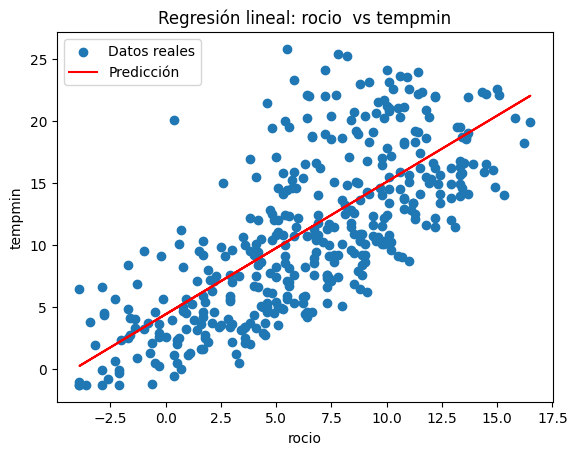

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

#Division de datos
from sklearn.model_selection import train_test_split

# Suponiendo que tenemos un DataFrame con X (variables) e y (target)
X_train, X_test, y_train, y_test = train_test_split(df[["valores_winsor_dew"]], df["valores_winsor_tempmin"], test_size=0.2, random_state=42)

print("Datos de entrenamiento:", len(X_train))
print("Datos de prueba:", len(X_test))

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")

#cuadratico
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

#Prueba de f y p
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()

print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

#mape
mask = y_test != 0  # Crear una máscara para excluir valores de y_test que sean 0
mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100
print(f"MAPE: {mape:.2f}%")


#r2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

# Graficar
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicción")
plt.xlabel("rocio")
plt.ylabel("tempmin")
plt.title("Regresión lineal: rocio  vs tempmin")
plt.legend()
plt.show()


In [10]:
# Función para hacer predicciones con nuevos valores de BMI
def predecir_progresion(dew):
    prediccion = modelo.predict([[dew]])[0]
    print(f"Predicción: Si hay rocio {dew:.2f} el dia tendrá una temperatura minima estimada de {prediccion:.2f} grados.")


predecir_progresion(5)  # Cambia este valor para probar


Predicción: Si hay rocio 5.00 el dia tendrá una temperatura minima estimada de 9.74 grados.


c:\Users\ia\Desktop\TrabajoTemperatura\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Datos de entrenamiento: 1628
Datos de prueba: 407
Error MAE: 2.61 (puntos de progresión)
RMSE: 3.15
                            OLS Regression Results                            
Dep. Variable:     valores_winsor_dew   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1654.
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          4.24e-250
Time:                        21:00:34   Log-Likelihood:                -4163.8
No. Observations:                1628   AIC:                             8332.
Df Residuals:                    1626   BIC:                             8342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

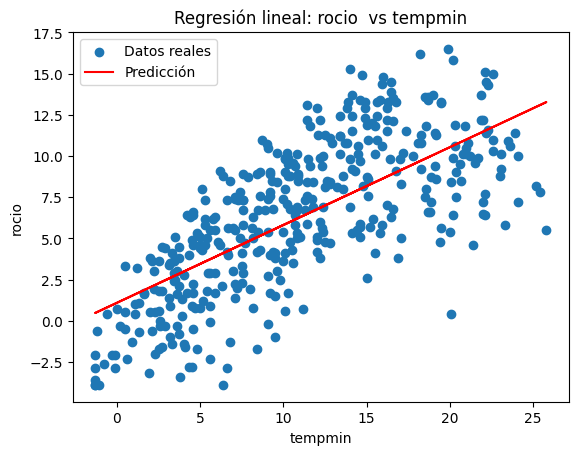

Predicción: Si hay tempmin 20.00 el dia tendrá un rocio estimao de 10.53 .


c:\Users\ia\Desktop\TrabajoTemperatura\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
# Suponiendo que tenemos un DataFrame con X (variables) e y (target)
X_train, X_test, y_train, y_test = train_test_split(df[["valores_winsor_tempmin"]],df["valores_winsor_dew"], test_size=0.2, random_state=42)

print("Datos de entrenamiento:", len(X_train))
print("Datos de prueba:", len(X_test))

# Entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"Error MAE: {mae:.2f} (puntos de progresión)")

#cuadratico
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

#Prueba de f y p
X_train_const = sm.add_constant(X_train)  # Agregar término de intercepto
modelo_stats = sm.OLS(y_train, X_train_const).fit()

print(modelo_stats.summary())  # Muestra F, p-valor y otros coeficientes

#mape
mask = y_test != 0  # Crear una máscara para excluir valores de y_test que sean 0
mape = np.mean(np.abs((y_test[mask] - y_pred[mask]) / y_test[mask])) * 100
print(f"MAPE: {mape:.2f}%")


#r2
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

# Graficar
plt.scatter(X_test, y_test, label="Datos reales")
plt.plot(X_test, y_pred, color="red", label="Predicción")
plt.xlabel("tempmin")
plt.ylabel("rocio")
plt.title("Regresión lineal: rocio  vs tempmin")
plt.legend()
plt.show()


def predecir_progresion(tempmin):
    prediccion = modelo.predict([[tempmin]])[0]
    print(f"Predicción: Si hay tempmin {tempmin:.2f} el dia tendrá un rocio estimao de {prediccion:.2f} .")

predecir_progresion(20)